In [0]:
# CONTEXT

# This dataset presents the top universities in the field of Life Science and Medicine according to QS rankings from 2018 to 2022. It is a well-organized dataset. 
#QS World University Rankings is a widely recognized ranking system that ranks universities globally based on various criteria such as academic reputation, employer reputation, faculty-student ratio, citations per faculty, etc. It is published annually by Quacquarelli Symonds (QS), a British company specializing in education and study abroad.

# VARIABLE DECLARATION:
# The dataset has 6 columns and over 5200 rows. The columns include:
# Year: This column lists the years 2018 to 2022.
# Rank: The rank assigned to each university by QS, with rank 1 being the highest.
# Name: The name of each university, listed in order of rank.
# Point: The points earned by each university, determined by factors such as education quality, faculty facilities, and student facilities.
# City: The city where the university is located.
# Country: The country where the university is located. 

#TARGET
# The goal of this dataset is to allow for insightful analysis and story creation. By using the data, WE build a dashboard and accompanying story.

In [0]:
# File location and type
file_location = "/FileStore/tables/data1.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

Year,Rank,Name,Point,City,Country
2018,1,Harvard University,97.7,Cambridge,United States
2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2018,2,University of Oxford,94.6,Oxford,United Kingdom
2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
2018,5,Johns Hopkins University,92.1,Baltimore,United States
2018,5,Stanford University,92.1,Stanford,United States
2018,7,Karolinska Institutet,90.2,Stockholm,Sweden
2018,8,UCL,88.6,London,United Kingdom
2018,9,"University of California, Los Angeles (UCLA)",88.5,Los Angeles,United States
2018,10,"University of California, San Francisco",88.1,San Francisco,United States


In [0]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from pyspark.sql import functions as F


In [0]:
#remove Na
df = df.na.drop()

In [0]:

df.agg(*(F.sum(F.when(F.isnull(c), 1).otherwise(0)).alias(c) for c in df.columns)).show()


+----+----+----+-----+----+-------+
|Year|Rank|Name|Point|City|Country|
+----+----+----+-----+----+-------+
|   0|   0|   0|    0|   0|      0|
+----+----+----+-----+----+-------+



In [0]:
df.printSchema()


root
 |-- Year: integer (nullable = true)
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Point: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
import pandas as pd

value_counts = {}
for col in df.columns:
    pd_df = df.select(col).toPandas()
    value_counts[col] = pd_df[col].value_counts()


In [0]:
value_counts = {}
for col in df.columns:
    values = df.select(col).rdd.flatMap(lambda x: x).collect()
    pd_df = pd.DataFrame({col: values})
    value_counts[col] = pd_df[col].value_counts()


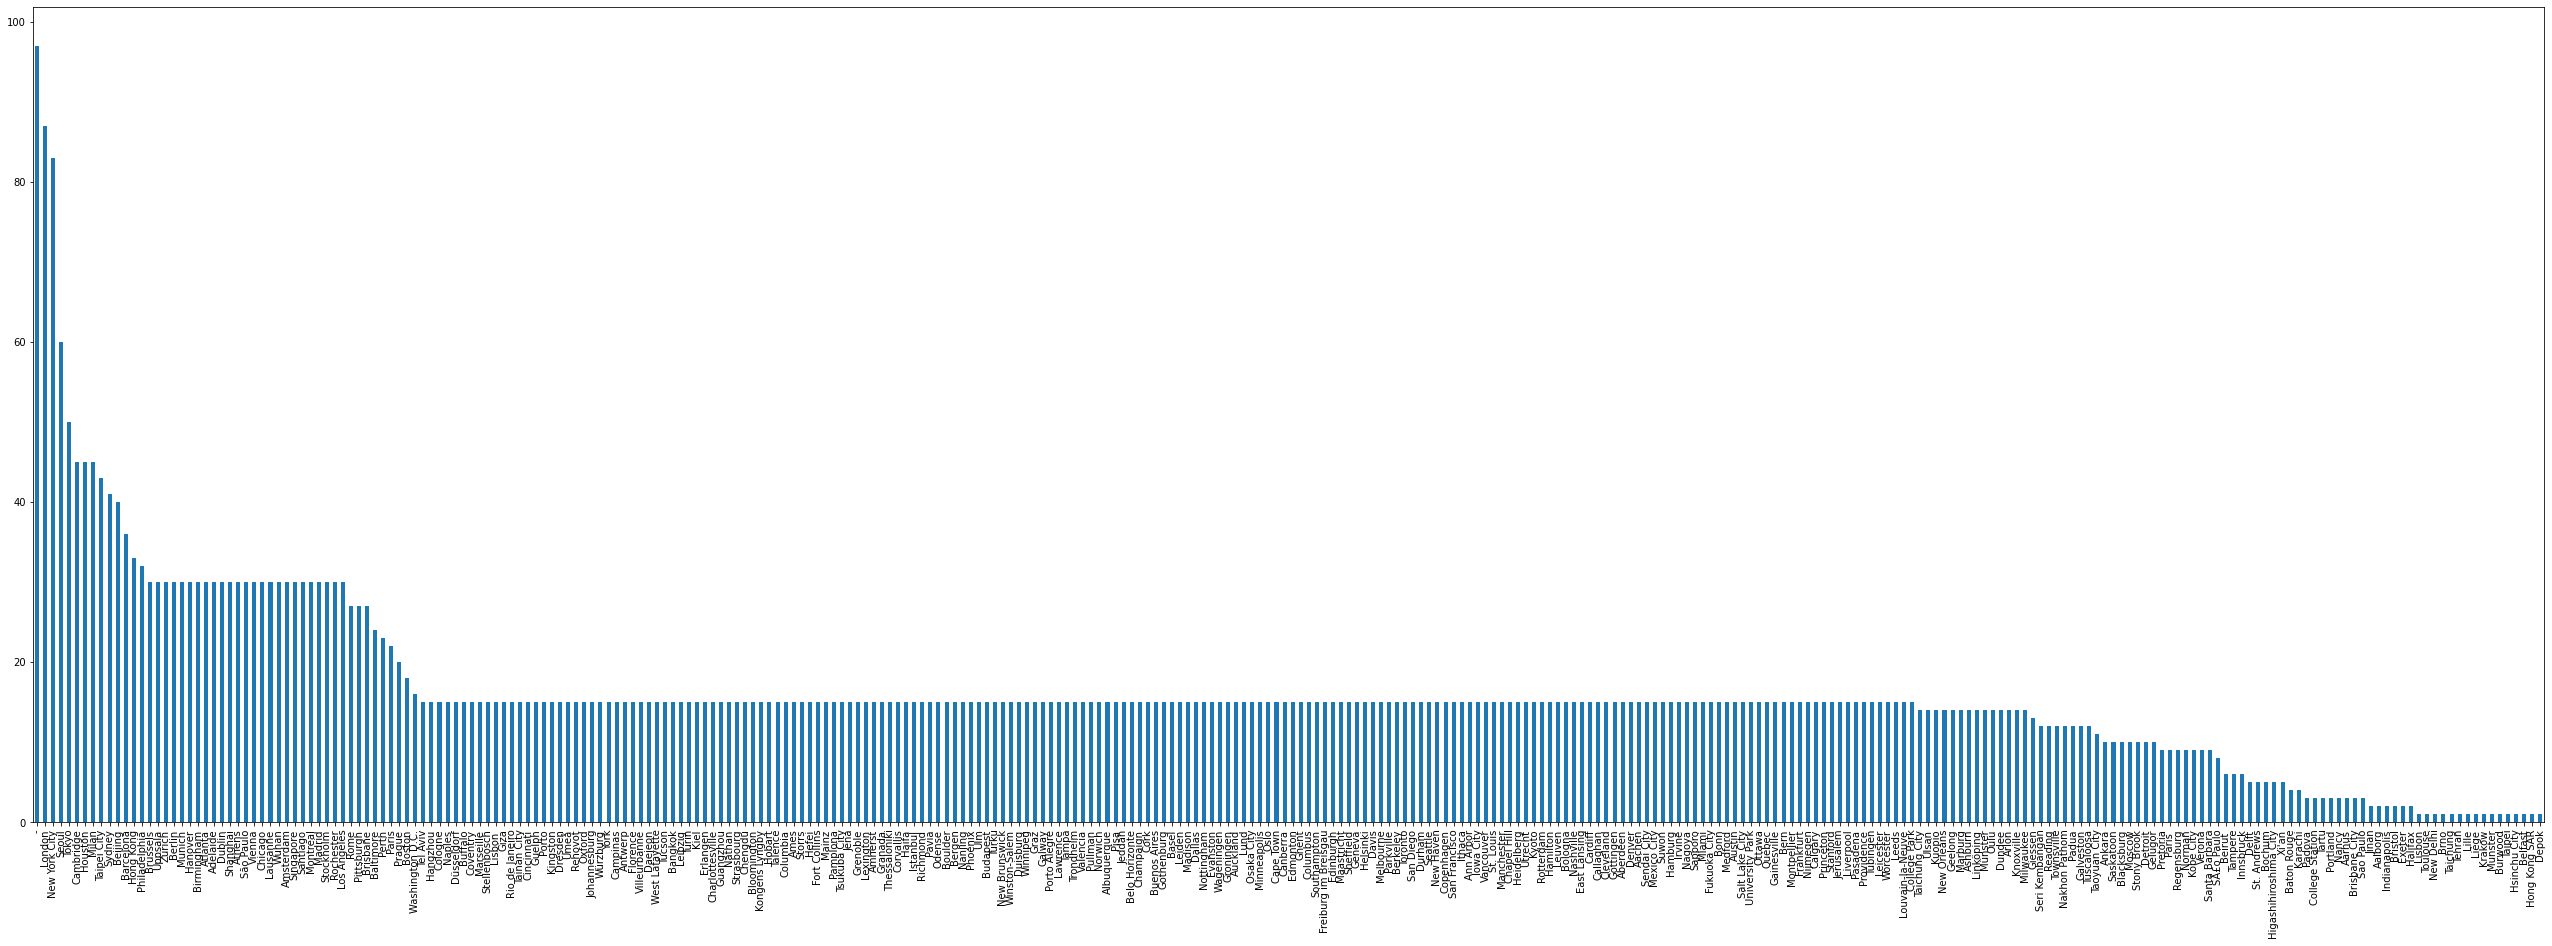

In [0]:
#Computing value counts
import pandas as pd
import matplotlib.pyplot as plt

pd_df = df.select("City").toPandas()
pd_df["City"].value_counts().plot(kind='bar', figsize=(45,15))
plt.show()


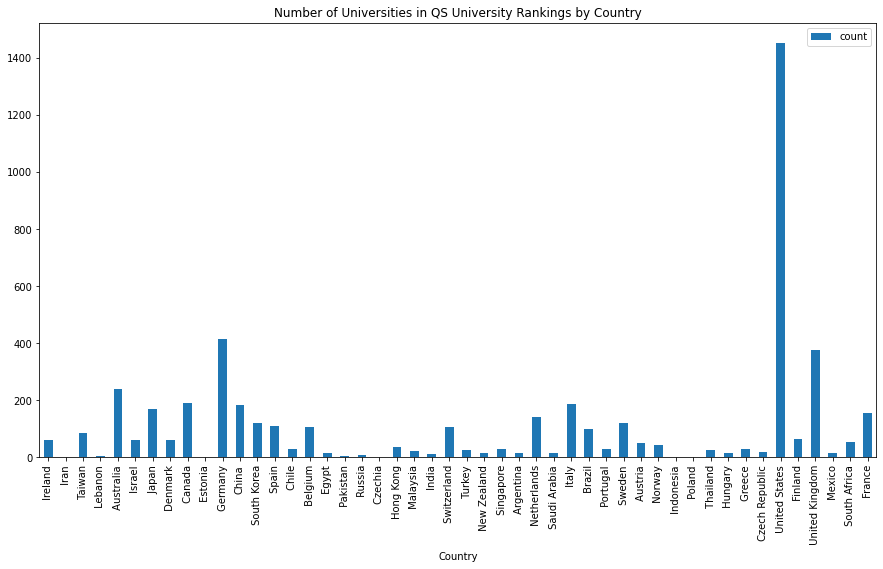

In [0]:
#Distribution of Universities by coutry

from pyspark.sql.functions import count

country_counts = df.groupBy("Country").agg(count("*").alias("count"))
country_counts_pd = country_counts.toPandas()

country_counts_pd.plot(kind='bar', x='Country', y='count', figsize=(15,8), rot=90)
plt.title('Number of Universities in QS University Rankings by Country')
plt.show()


In [0]:
## Segregating the rankings year wise
# To segregate the rankings by year, we would need to create separate groups for each year in the "Year" column of the dataset. We can then analyze the rankings within each year group to compare the top universities for that specific year.

df2018 = df.filter(df["Year"] == 2018)
df2019 = df.filter(df["Year"] == 2019)
df2020 = df.filter(df["Year"] == 2020)
df2021 = df.filter(df["Year"] == 2021)
df2022 = df.filter(df["Year"] == 2022)


In [0]:
#Top 5 Universities 
df2022.show(5)


+----+----+--------------------+-----+---------+---------------+
|Year|Rank|                Name|Point|     City|        Country|
+----+----+--------------------+-----+---------+---------------+
|2022|   1|  Harvard University| 97.7|Cambridge|  United States|
|2022|   2|University of Cam...| 94.6|Cambridge| United Kingdom|
|2022|   2|University of Oxford| 94.6|   Oxford| United Kingdom|
|2022|   4|Massachusetts Ins...| 92.5|Cambridge|  United States|
|2022|   5|Johns Hopkins Uni...| 92.1|Baltimore|  United States|
+----+----+--------------------+-----+---------+---------------+
only showing top 5 rows



In [0]:
# least 5 ranked universities
df2022.show(5, truncate=False)


+----+----+-------------------------------------------+-----+---------+---------------+
|Year|Rank|Name                                       |Point|City     |Country        |
+----+----+-------------------------------------------+-----+---------+---------------+
|2022|1   |Harvard University                         |97.7 |Cambridge| United States |
|2022|2   |University of Cambridge                    |94.6 |Cambridge| United Kingdom|
|2022|2   |University of Oxford                       |94.6 |Oxford   | United Kingdom|
|2022|4   |Massachusetts Institute of Technology (MIT)|92.5 |Cambridge| United States |
|2022|5   |Johns Hopkins University                   |92.1 |Baltimore| United States |
+----+----+-------------------------------------------+-----+---------+---------------+
only showing top 5 rows



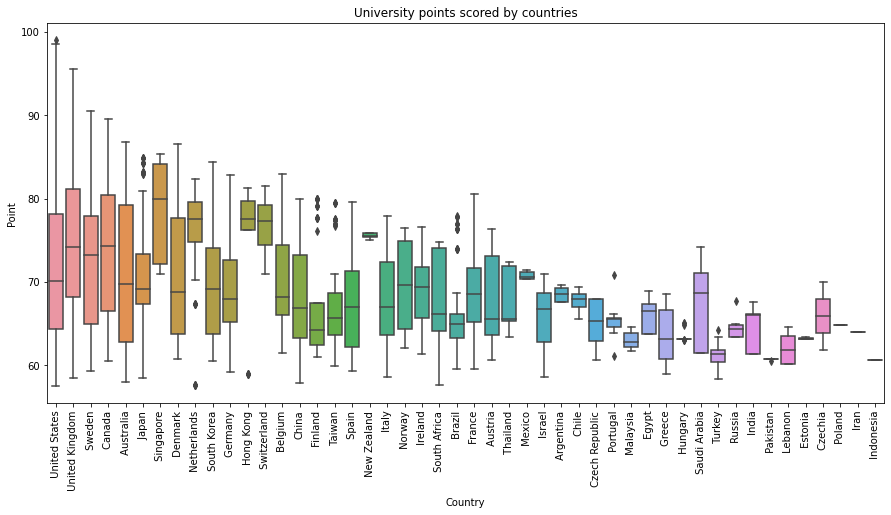

In [0]:
#plot the points scored by Universities from different countries

pandas_df = df.toPandas()
plt.figure(figsize=(15,7))
sns.boxplot(data=pandas_df, x='Country', y='Point')
plt.xticks(rotation=90)
plt.title('University points scored by countries')
plt.show()


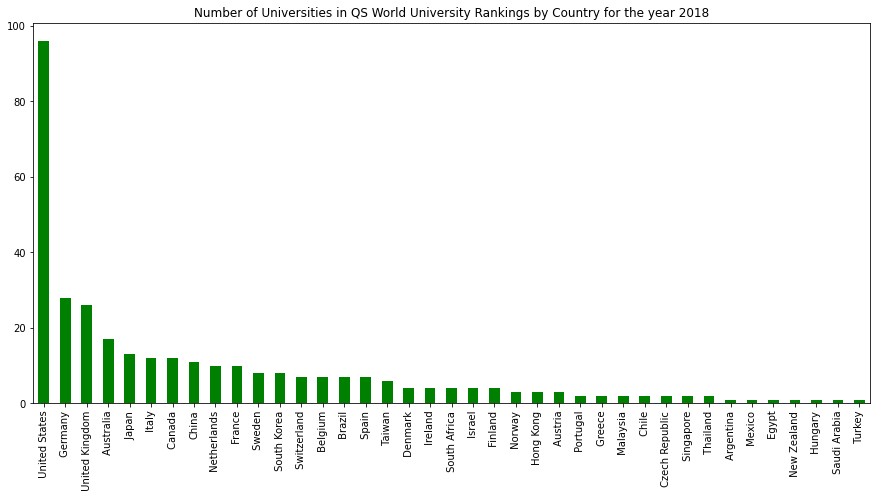

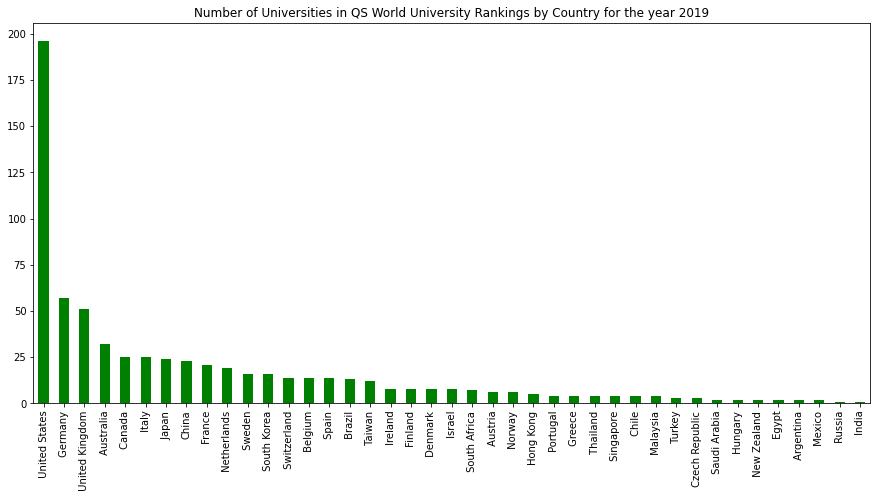

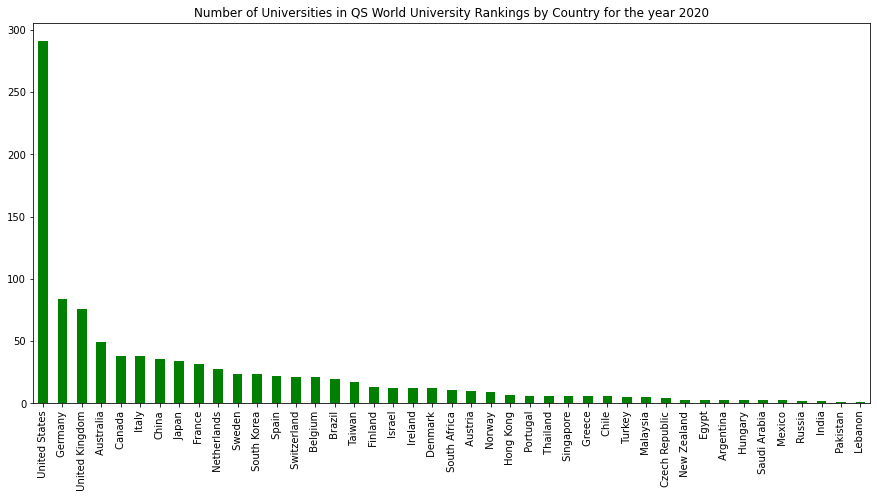

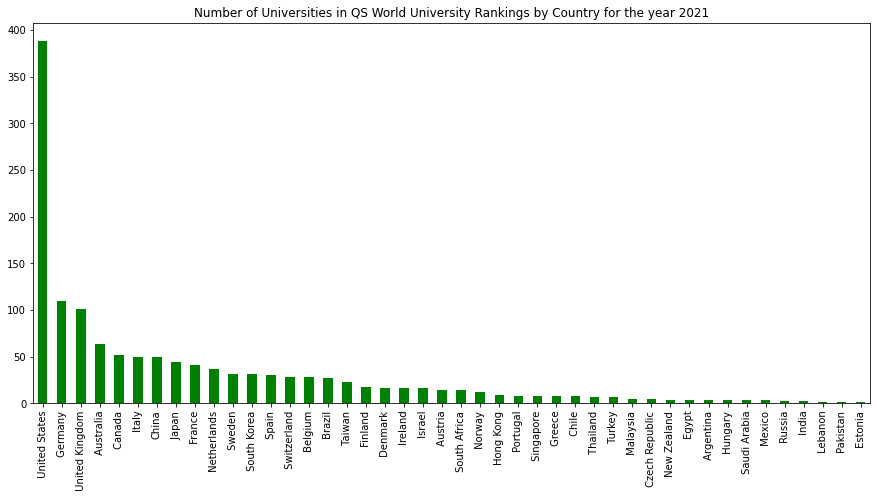

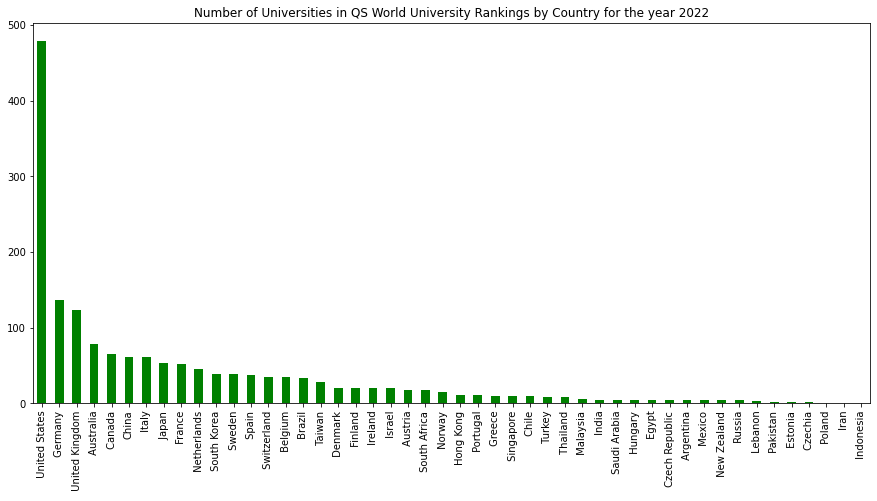

In [0]:
#Visualizing Number of Universities in QS World University Rankings by Country for the year


dfs = [df2018, df2019, df2020, df2021, df2022]
year = 2018
for df in dfs:
    pandas_df = df.toPandas()
    plt.figure(figsize=(15,7))
    pandas_df['Country'].value_counts().plot.bar(color='green')
    text = str(year)
    plt.title('Number of Universities in QS World University Rankings by Country for the year ' + text)
    year = year + 1
    plt.show()


In [0]:
#create individual data frames of count of number of universities per year

dfs=[df2018,df2019,df2020,df2021,df2022]
year=2018
counts=[]
for df in dfs:
    temp_df = df.select("Country").toPandas()
    counts.append(pd.DataFrame(temp_df['Country'].value_counts()))


In [0]:
#Adding years as the column headings

year=2018
for i in counts:
    col=str(year)
    i.columns=[col]
    year=year+1
counts

Out[74]: [                 2018
  United States     96
  Germany           28
  United Kingdom    26
  Australia         17
  Japan             13
  Italy             12
  Canada            12
 China              11
  Netherlands       10
  France            10
  Sweden             8
  South Korea        8
  Switzerland        7
  Belgium            7
  Brazil             7
  Spain              7
  Taiwan             6
  Denmark            4
  Ireland            4
  South Africa       4
  Israel             4
  Finland            4
  Norway             3
 Hong Kong           3
  Austria            3
  Portugal           2
  Greece             2
  Malaysia           2
  Chile              2
  Czech Republic     2
  Singapore          2
  Thailand           2
  Argentina          1
  Mexico             1
  Egypt              1
  New Zealand        1
  Hungary            1
  Saudi Arabia       1
  Turkey             1,
                  2019
  United States    196
  Germany           57
 

In [0]:
#Makig a total data frame of all years counts (keeping only countries that were there in 2018 ranking list)

counts[0]['2019']=counts[1]['2019']
counts[0]['2020']=counts[2]['2020']
counts[0]['2021']=counts[3]['2021']
counts[0]['2022']=counts[4]['2022']

fin_count=counts[0]
fin_count

,2018,2019,2020,2021,2022
United States,96,196,291,388,479
Germany,28,57,84,110,137
United Kingdom,26,51,76,101,123
Australia,17,32,49,64,79
Japan,13,24,34,44,54
Italy,12,25,38,50,61
Canada,12,25,38,52,65
China,11,23,36,50,62
Netherlands,10,19,28,37,46
France,10,21,32,41,52


In [0]:
fin_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries,  United States to  Turkey
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2018    39 non-null     int64
 1   2019    39 non-null     int64
 2   2020    39 non-null     int64
 3   2021    39 non-null     int64
 4   2022    39 non-null     int64
dtypes: int64(5)
memory usage: 1.8+ KB


<Figure size 1800x864 with 0 Axes>

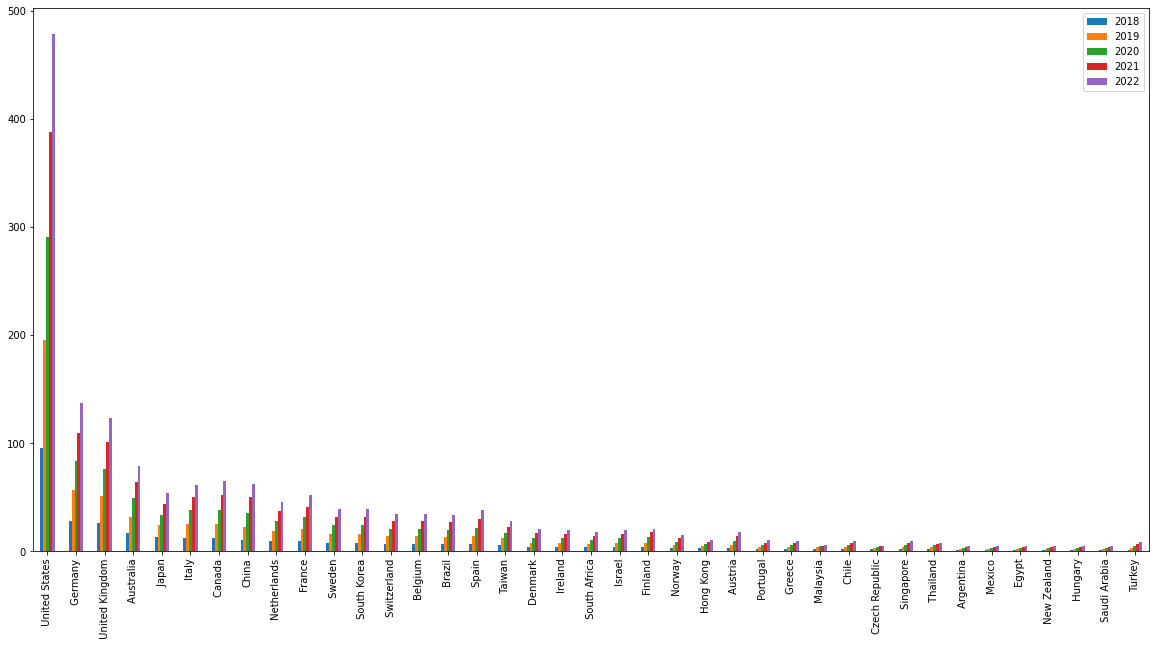

In [0]:
#plot showing the growth of number of Universities in the QS rankings

plt.figure(figsize=(25,12))
fin_count.plot(kind='bar',figsize=(20,10))
plt.show()

In [0]:
#compute percentage change in number of Universities from 2018 to 2022

fin_count['per_ch']=(fin_count['2022']-fin_count['2018'])/fin_count['2018']*100
fin_count

,2018,2019,2020,2021,2022,per_ch
United States,96,196,291,388,479,398.958333
Germany,28,57,84,110,137,389.285714
United Kingdom,26,51,76,101,123,373.076923
Australia,17,32,49,64,79,364.705882
Japan,13,24,34,44,54,315.384615
Italy,12,25,38,50,61,408.333333
Canada,12,25,38,52,65,441.666667
China,11,23,36,50,62,463.636364
Netherlands,10,19,28,37,46,360.000000
France,10,21,32,41,52,420.000000


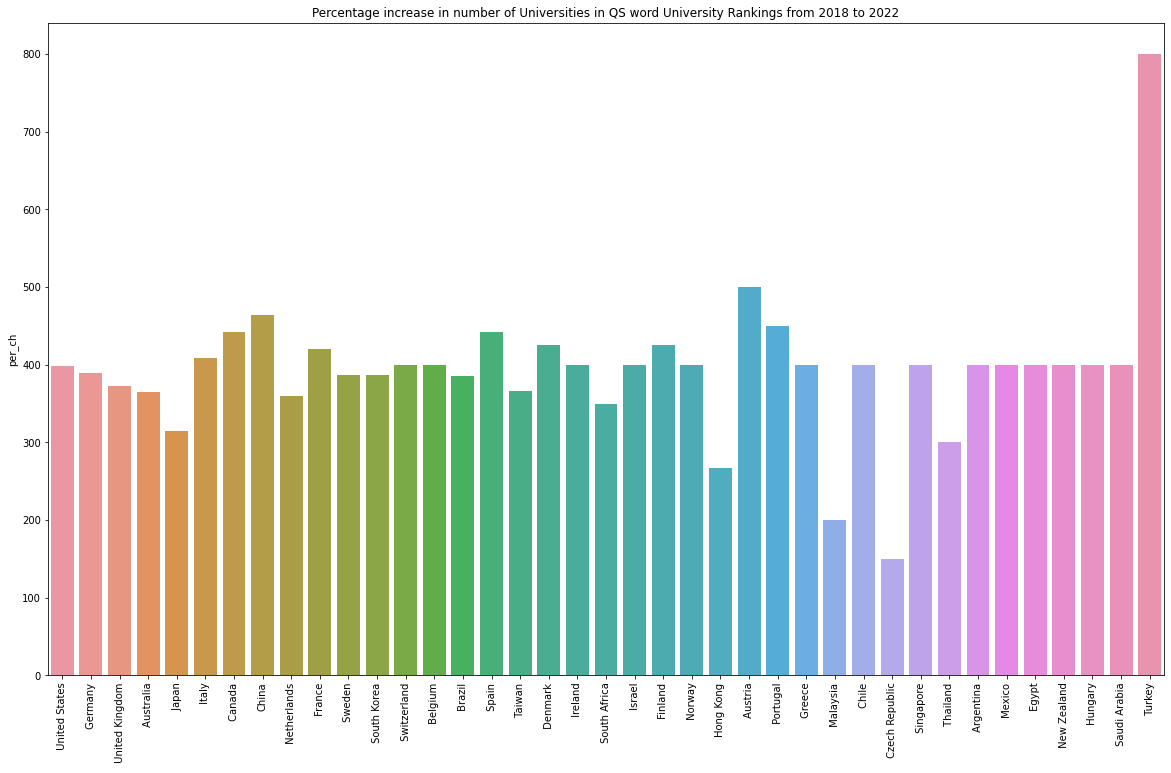

In [0]:
#plot percentage of increase in number of universities from 2018 to 2022

plt.figure(figsize=(20,12))
sns.barplot(data=fin_count,x=fin_count.index,y='per_ch')
plt.title('Percentage increase in number of Universities in QS word University Rankings from 2018 to 2022')
plt.xticks(rotation=90)
plt.show()

In [0]:
#computing contribution of each country to the QS world University rankings for years

fin_count['2018_prop']=fin_count['2018']/(fin_count['2018'].sum())*100
fin_count['2019_prop']=fin_count['2019']/(fin_count['2019'].sum())*100
fin_count['2020_prop']=fin_count['2020']/(fin_count['2020'].sum())*100
fin_count['2021_prop']=fin_count['2021']/(fin_count['2021'].sum())*100
fin_count['2022_prop']=fin_count['2022']/(fin_count['2022'].sum())*100
fin_count

,2018,2019,2020,2021,2022,per_ch,2018_prop,2019_prop,2020_prop,2021_prop,2022_prop
United States,96,196,291,388,479,398.958333,28.656716,29.253731,29.012961,29.107277,29.047908
Germany,28,57,84,110,137,389.285714,8.358209,8.507463,8.374875,8.252063,8.308065
United Kingdom,26,51,76,101,123,373.076923,7.761194,7.611940,7.577268,7.576894,7.459066
Australia,17,32,49,64,79,364.705882,5.074627,4.776119,4.885344,4.801200,4.790782
Japan,13,24,34,44,54,315.384615,3.880597,3.582090,3.389831,3.300825,3.274712
Italy,12,25,38,50,61,408.333333,3.582090,3.731343,3.788634,3.750938,3.699212
Canada,12,25,38,52,65,441.666667,3.582090,3.731343,3.788634,3.900975,3.941783
China,11,23,36,50,62,463.636364,3.283582,3.432836,3.589232,3.750938,3.759854
Netherlands,10,19,28,37,46,360.000000,2.985075,2.835821,2.791625,2.775694,2.789569
France,10,21,32,41,52,420.000000,2.985075,3.134328,3.190429,3.075769,3.153426


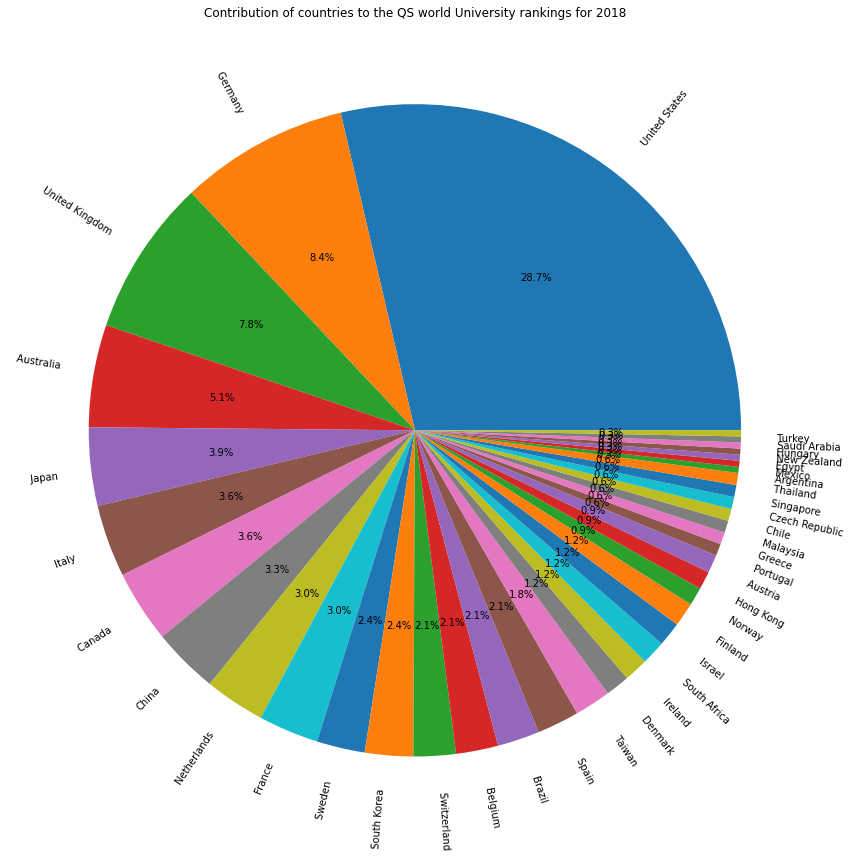

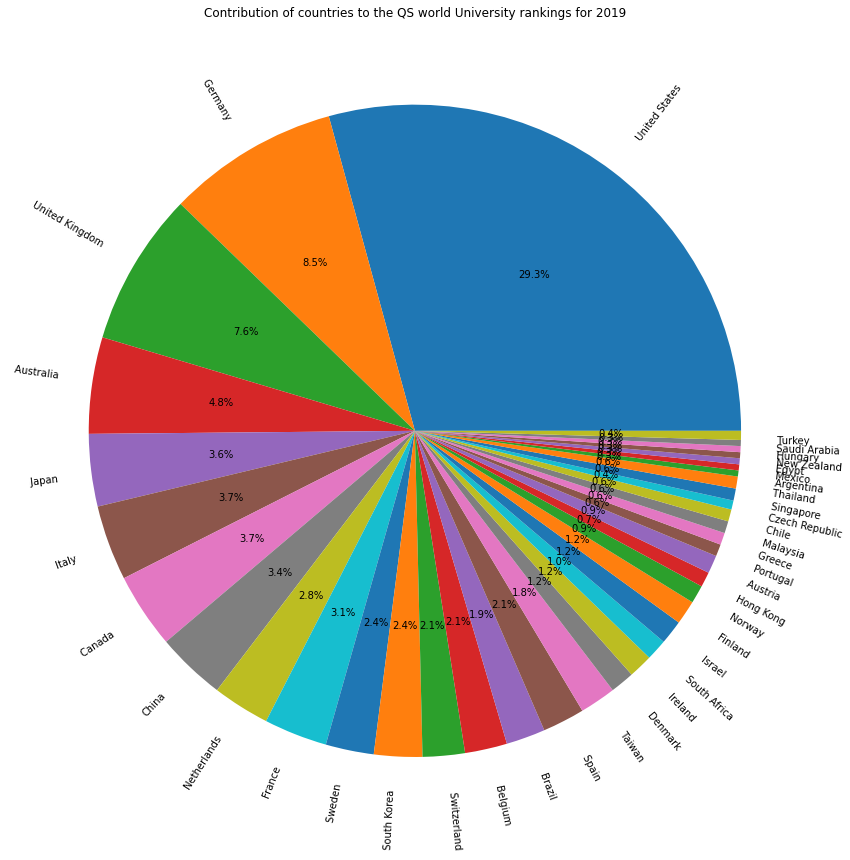

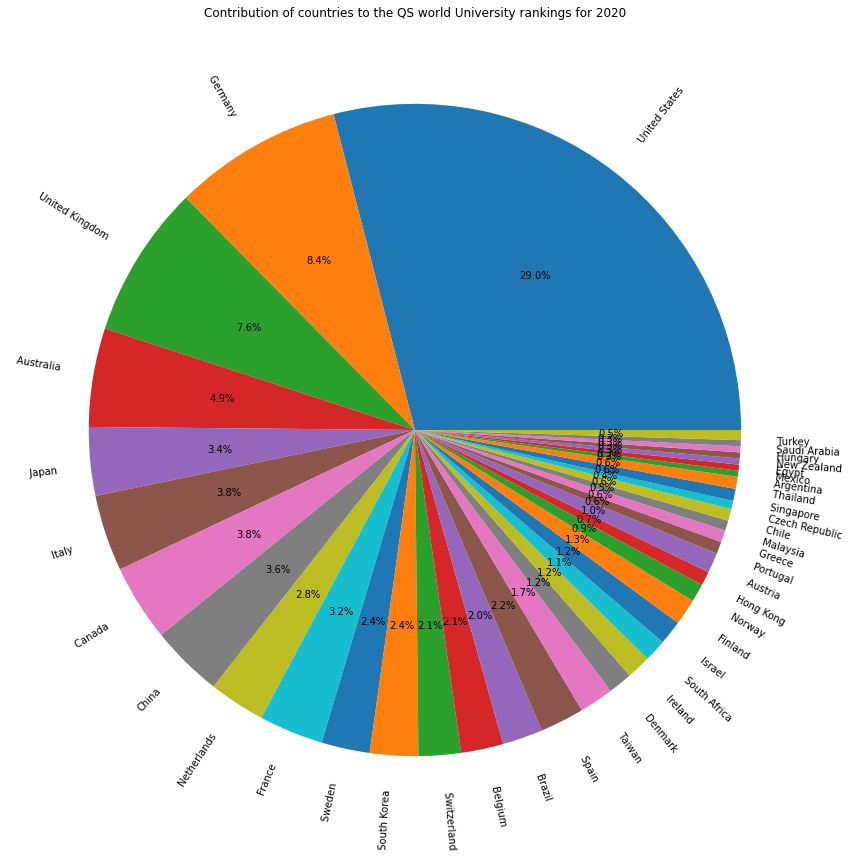

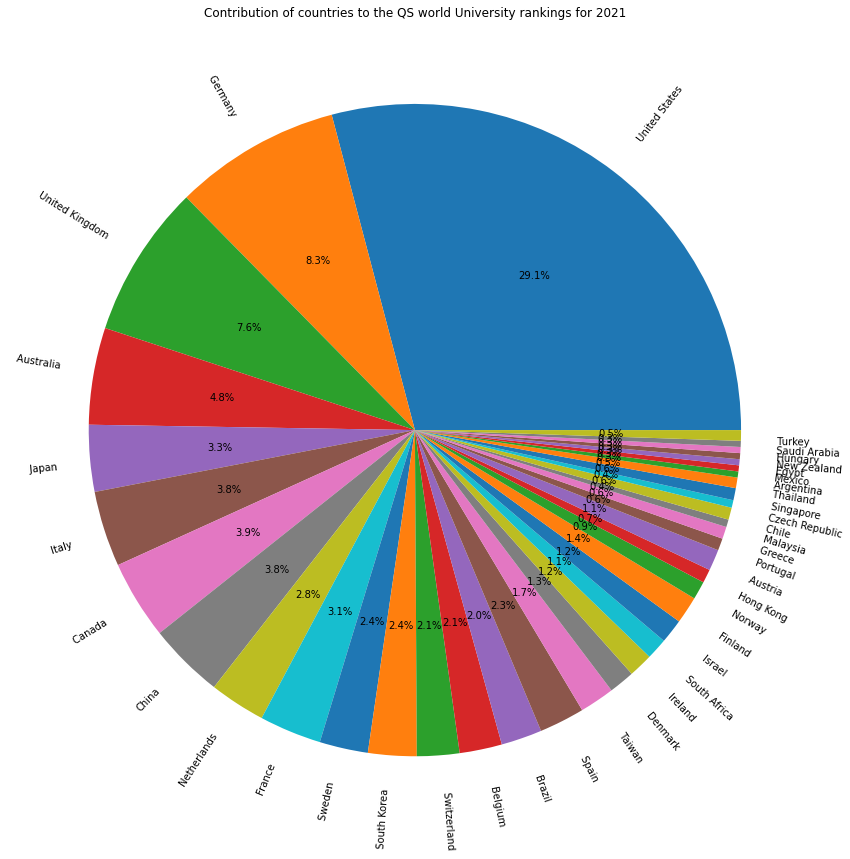

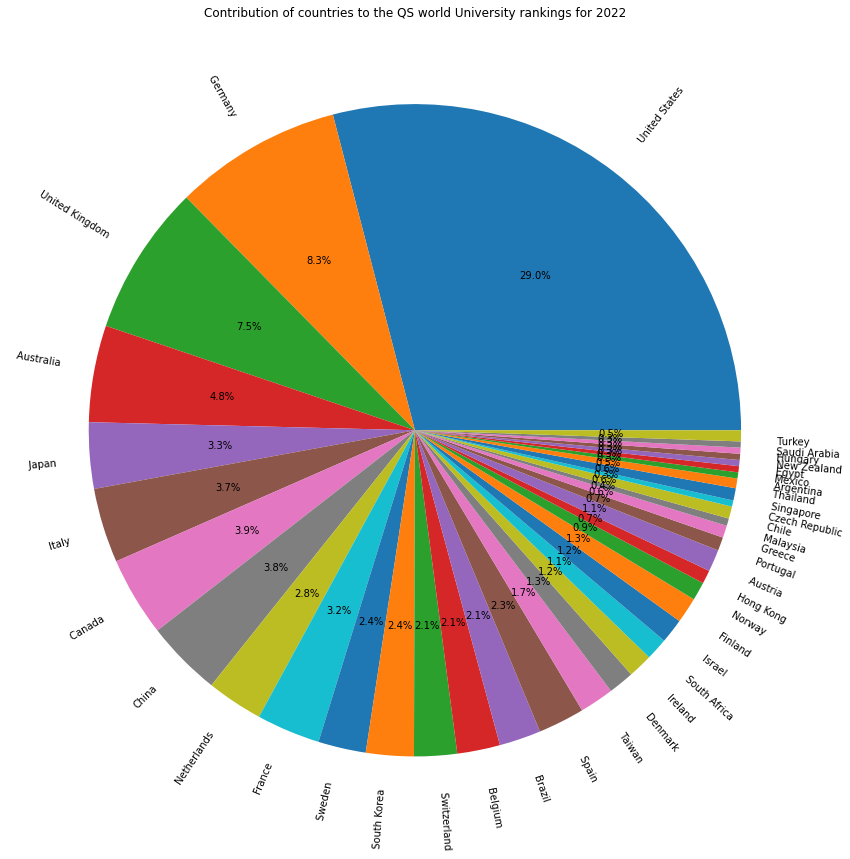

In [0]:
#plot the contribution of each country to the Rankings

prop_cols=['2018_prop','2019_prop','2020_prop','2021_prop','2022_prop']
year=2018
for col in prop_cols:
    
    text=str(year)
    plt.figure(figsize=(15,15))
    plt.pie(x=fin_count[col],labels=fin_count.index,autopct='%.1f%%',rotatelabels=True)
    plt.title('Contribution of countries to the QS world University rankings for '+text)
    year=year+1
    plt.show()

In [0]:
# CONCLUSION : The US, Germany and the UK constantly ranked in the first three places.